In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from utils import evaluate, plot_roc_curves

In [7]:
 # Load the Iris dataset
df = pd.read_csv('IRIS.csv')


In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.duplicated().sum()

3

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df['species'] = df['species'].replace('Iris-setosa', 0.0)
df['species'] = df['species'].replace('Iris-versicolor', 1.0)
df['species'] = df['species'].replace('Iris-virginica', 2.0)

C:\Users\hp\AppData\Local\Temp\ipykernel_1824\3929714483.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('Iris-virginica', 2.0)


In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [16]:
X = df.drop(columns=['species'])
y = df.species
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
def init_models():

    
    
    knn = KNeighborsClassifier()
    decision_tree = DecisionTreeClassifier(random_state=42)
    random_forest = RandomForestClassifier(random_state=42)
    logistic_regression = LogisticRegression(max_iter=200, random_state=42)
    
    
    knn.fit(X_train, y_train)
    decision_tree.fit(X_train, y_train)
    random_forest.fit(X_train, y_train)
    logistic_regression.fit(X_train, y_train)
    
    
    return knn, decision_tree, random_forest, logistic_regression

In [18]:
knn, decision_tree, random_forest, logistic_regression = init_models()


In [19]:
knn, decision_tree, random_forest, logistic_regression

(KNeighborsClassifier(),
 DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 LogisticRegression(max_iter=200, random_state=42))

In [20]:
y_knn = knn.predict(X_test)
y_dtr = decision_tree.predict(X_test)
y_rf = random_forest.predict(X_test)
y_lr = logistic_regression.predict(X_test)

K-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      0.86      0.92         7
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



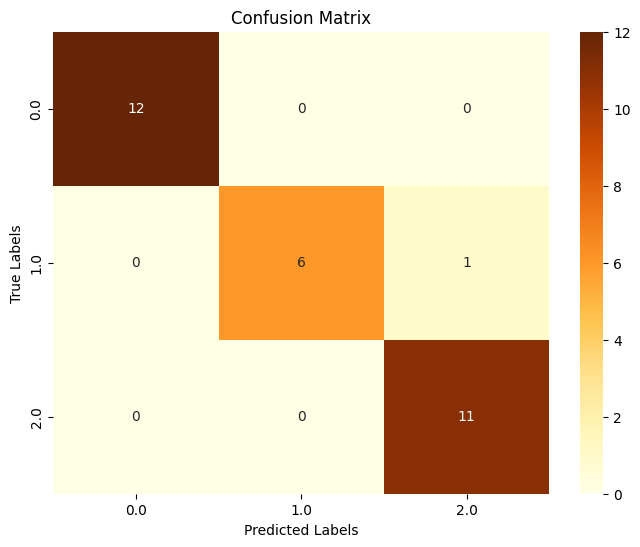

Decision Tree Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      0.86      0.92         7
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



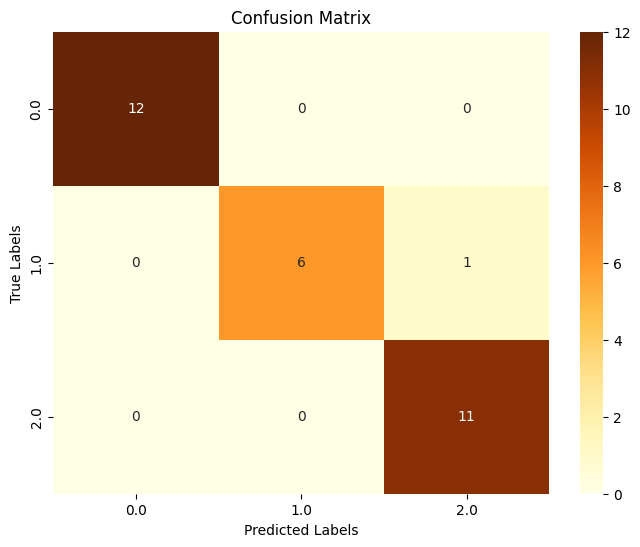

Random Forest Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      0.86      0.92         7
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



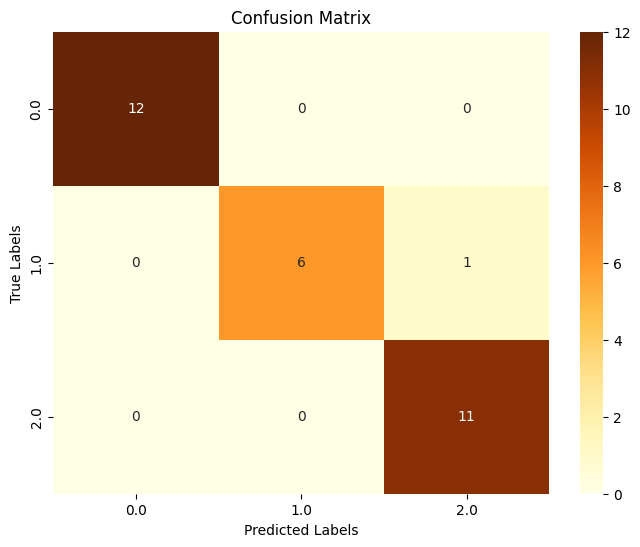

Logistic Regression Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      0.86      0.92         7
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



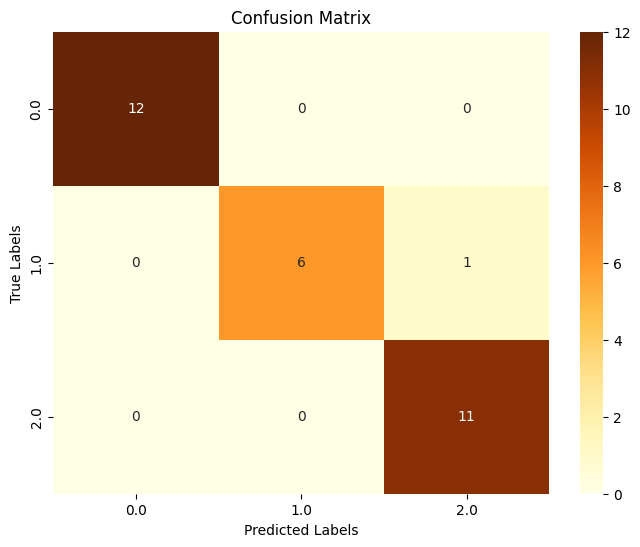

In [21]:
to_evaluate = {
    "K-Nearest Neighbors": (y_test, y_knn),
    "Decision Tree": (y_test, y_dtr),
    "Random Forest": (y_test, y_rf),
    "Logistic Regression": (y_test, y_lr)
}

for model_name, (y_test, y_pred) in to_evaluate.items():
    evaluate(y_test, y_pred, model_name)

In [22]:
y_knn_proba = knn.predict_proba(X_test) if hasattr(knn, "predict_proba") else None
y_dtr_proba = decision_tree.predict_proba(X_test) 
y_rf_proba = random_forest.predict_proba(X_test) 
y_lr_proba = logistic_regression.predict_proba(X_test) 

### from the AUC we see that for KNN and Logistic regression have the big AUC so they are the best models here for this case 

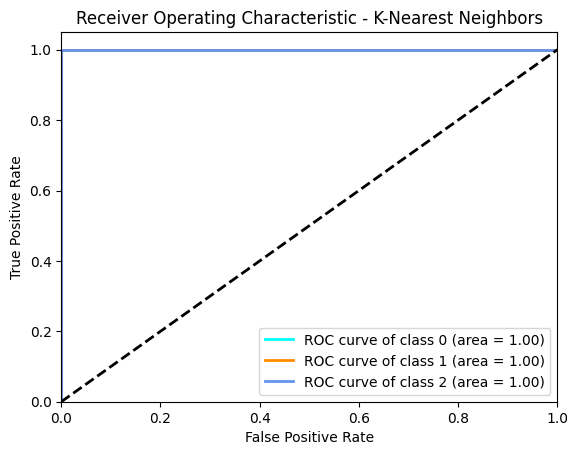

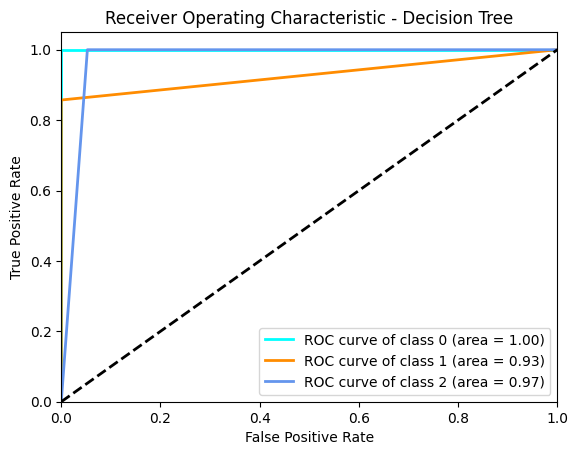

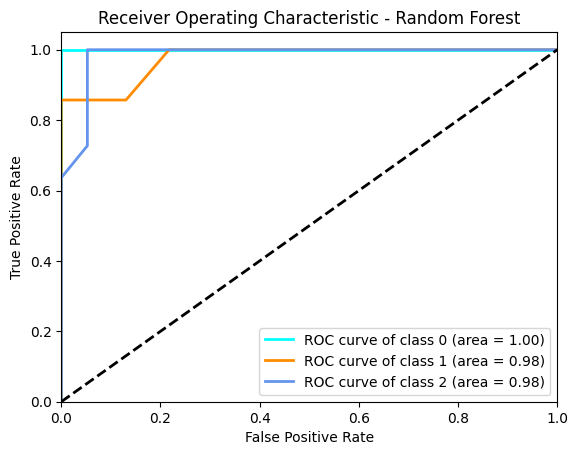

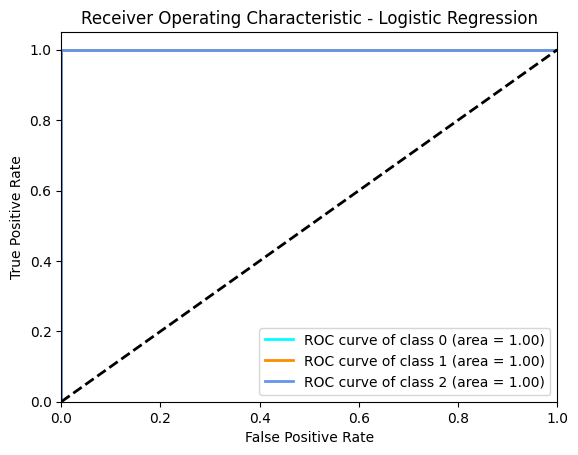

In [23]:
plot_roc_curves(y_test, y_knn_proba, "K-Nearest Neighbors") 
plot_roc_curves(y_test, y_dtr_proba, "Decision Tree")
plot_roc_curves(y_test, y_rf_proba, "Random Forest")
plot_roc_curves(y_test, y_lr_proba, "Logistic Regression")